<a href="https://colab.research.google.com/github/Rishi4488/Customer-Segmentation-Using-KMeans-Clustering/blob/main/E_commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [84]:
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [85]:
df=pd.read_csv("customer_segmentation.csv")
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [86]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [87]:
df.Gender.value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [88]:
df['Gender'].fillna('F', inplace=True)

In [89]:
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [90]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [91]:
df = df.drop_duplicates()

In [92]:
df["Gender"] = df["Gender"].map({"M" : 0, "F" : 1})

In [93]:
del df['Cust_ID']

In [94]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df.value_counts

<bound method DataFrame.value_counts of        Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0           0       7       0         0        0     0     0   
1           1       0       0         1        0     0     0   
2           0       7       0         1        0     0     0   
3           1       0       0         0        0     0     0   
4           1      10       0         0        0     0     0   
...       ...     ...     ...       ...      ...   ...   ...   
29995       0       0       0         0        0     0     0   
29996       0       1       0         1        0     0     0   
29997       0       0       0         1        0     0     0   
29998       0       0       0         0        0     0     0   
29999       1       3       2         0        0     1     0   

       Mondelez International  Wrangler  Vans  ...  LG  Dior  Scabal  \
0                           0         0     2  ...   0     0       0   
1                           0         0     0  

In [96]:
df.describe()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.825933,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,0.379173,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


# Declare feature and target variable

In [97]:
x = df

y = df['Orders']

In [98]:
x.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# Feature Scaling

In [99]:
cols = df.columns

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

df = ms.fit_transform(df)
df = pd.DataFrame(df, columns=[cols])
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.0,0.583333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.125,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
1,1.0,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
2,0.0,0.583333,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000
3,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
4,1.0,0.833333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625


# Clustering

## Elbow plot

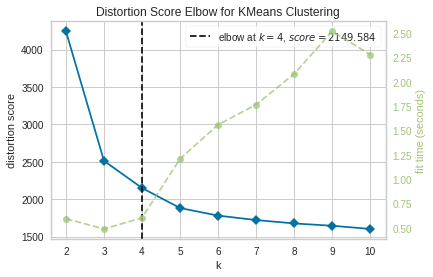

In [100]:
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(df)
elbow_graph.show()

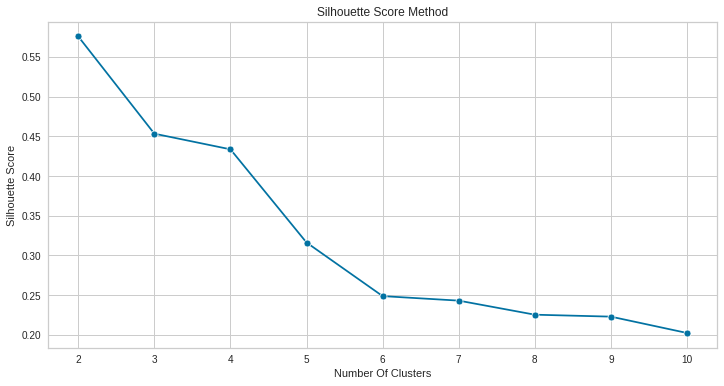

In [101]:
clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
s_scores = [] # silhouette scores

for n in clusters:
    kmeans = KMeans(n_clusters = n, random_state=43).fit(df)
    silhouette = silhouette_score(df, kmeans.labels_)
    s_scores.append(silhouette)

plt.figure(figsize=(12,6))
sns.lineplot(clusters, s_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

1. As you can see we are getting really bad silhouete score
2. The higher the number of features in the clustering problem, the more difficult it will be to work with, processing high-dimensional data will bring high processing power and cost.
3. So we can do size reduction before clustering..
4. We will use PCA : It is a technique that reduces the dimensionality of datasets, increases their interpretability, and also minimizes information loss.

#  Principal Component Analysis

Explained Variance Ratio For n_components=1 is 50.4893912367107


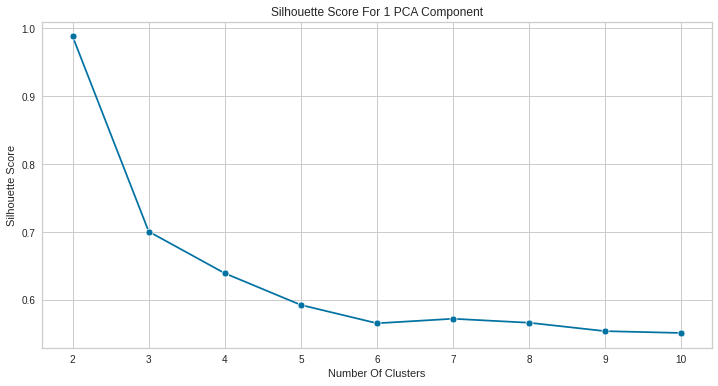

Explained Variance Ratio For n_components=2 is 81.80279313335241


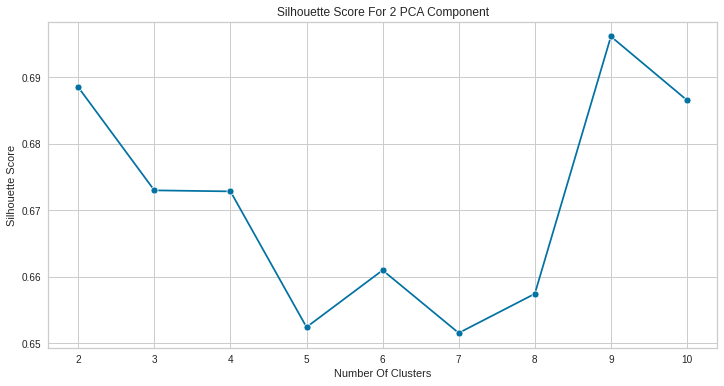

Explained Variance Ratio For n_components=3 is 83.94770058830849


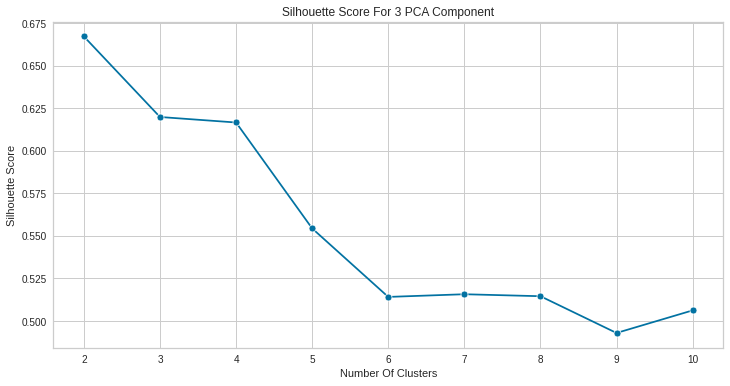

Explained Variance Ratio For n_components=4 is 85.28172983302238


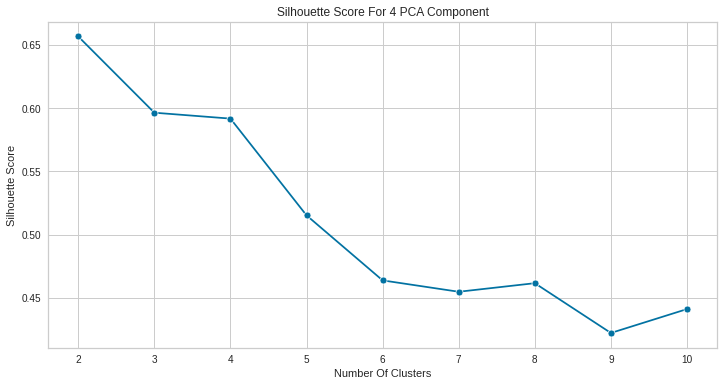

Explained Variance Ratio For n_components=5 is 86.5499459998826


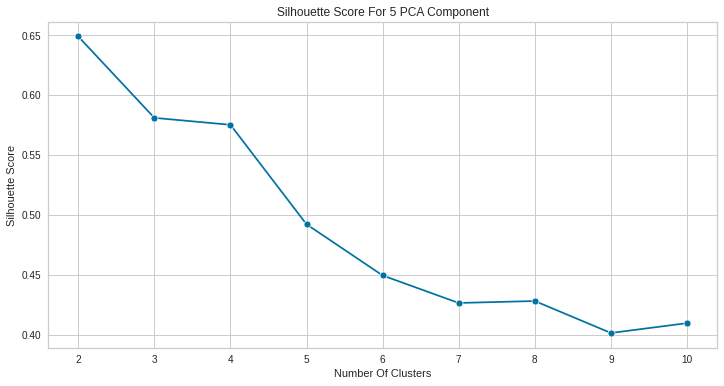

Explained Variance Ratio For n_components=6 is 87.69653723053165


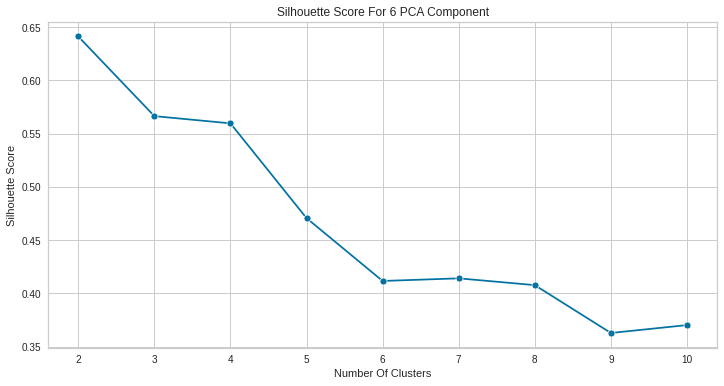

Explained Variance Ratio For n_components=7 is 88.81879145328782


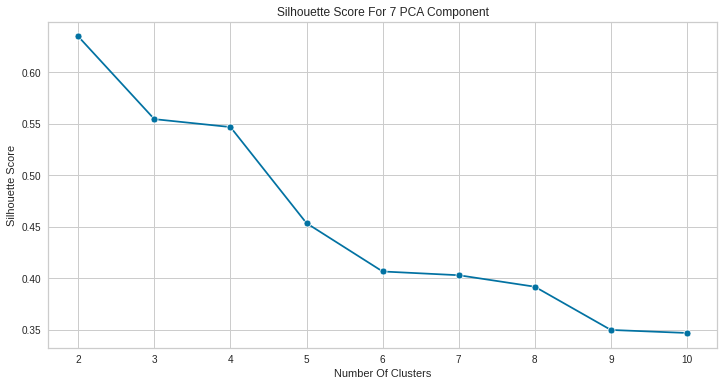

Explained Variance Ratio For n_components=8 is 89.7910536599321


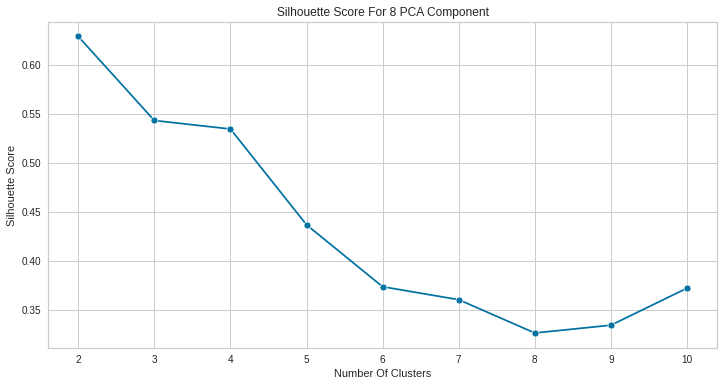

In [102]:
# block of code to findout for how many n_components we are getting best silhouette score

components = [1,2,3,4,5,6,7,8]

for n in components:
    pca = PCA(n_components = n, random_state=43)
    pca.fit(df)
    pca_df = pca.transform(df)
    print('Explained Variance Ratio For n_components={} is {}'.format(n,pca.explained_variance_ratio_.sum() * 100))
    
    clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
    s_scores = [] # silhouette scores
    for k in clusters:
        kmeans = KMeans(n_clusters = k, random_state=43).fit(pca_df)
        silhouette = silhouette_score(pca_df, kmeans.labels_)
        s_scores.append(silhouette)

    plt.figure(figsize=(12,6))
    sns.lineplot(clusters, s_scores, marker='o')
    plt.title('Silhouette Score For {} PCA Component'.format(n))
    plt.xlabel('Number Of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()